In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [3]:
video_games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [4]:
video_games['User_Score'] = video_games['User_Score'] * 10

In [5]:
video_games = video_games.dropna(subset=['User_Score', 'Critic_Score'])

In [6]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7013 entries, 0 to 16705
Data columns (total 16 columns):
Name               7013 non-null object
Platform           7013 non-null object
Year_of_Release    6890 non-null object
Genre              7013 non-null object
Publisher          7009 non-null object
NA_Sales           7013 non-null float64
EU_Sales           7013 non-null float64
JP_Sales           7013 non-null float64
Other_Sales        7013 non-null float64
Global_Sales       7013 non-null float64
Critic_Score       7013 non-null float64
Critic_Count       7013 non-null float64
User_Score         7013 non-null float64
User_Count         7013 non-null float64
Developer          7009 non-null object
Rating             6943 non-null object
dtypes: float64(9), object(7)
memory usage: 739.7+ KB


## Choose one variable and plot that variable four different ways.

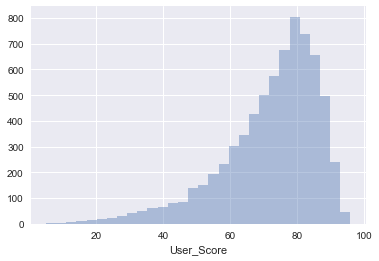

In [9]:
ax = sns.distplot(video_games['User_Score'], kde=False, bins=30)

Histogram plot shows distribution of user scores. Able to quickly see the density of values and how much variation there is.

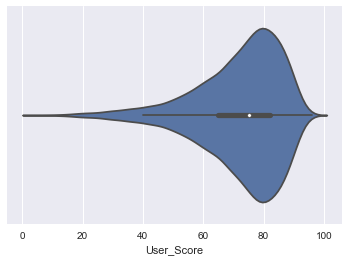

In [10]:
ax = sns.violinplot(x='User_Score', data=video_games)

Violin plot shows the distribution of quantitative data across several levels. 

Violins for small samples can look misleadinly smooth.

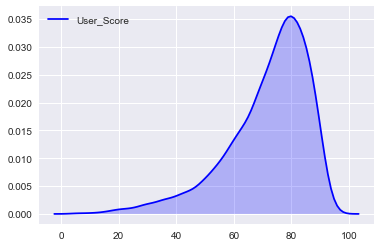

In [11]:
ax = sns.kdeplot(video_games['User_Score'], color='b', shade=True)

KDE plot shows a density curve very much like the above histogram.

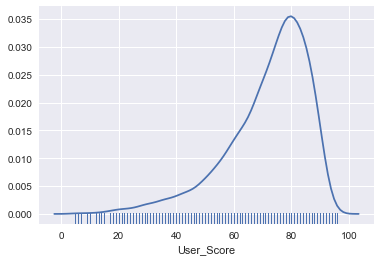

In [13]:
ax = sns.distplot(video_games['User_Score'], rug=True, hist=False)

The rugplot shows datapoints in an array as sticks on an axis.

## Choose two continuous variables, and plot them three different ways

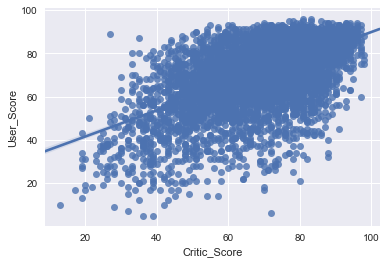

In [51]:
g = sns.regplot(x='Critic_Score', y='User_Score', data=video_games)

Plots continuous data in a scatter plot and plots a linear regression line.

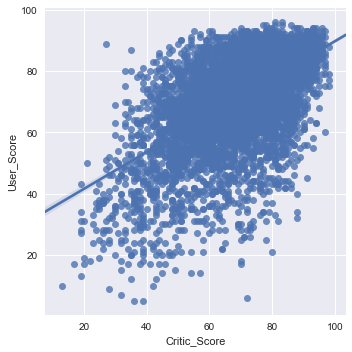

In [14]:
ax = sns.lmplot(x='Critic_Score', y='User_Score', data=video_games)

Very similar to the regplot, however it needs to occupy its own space in a FacetGric.

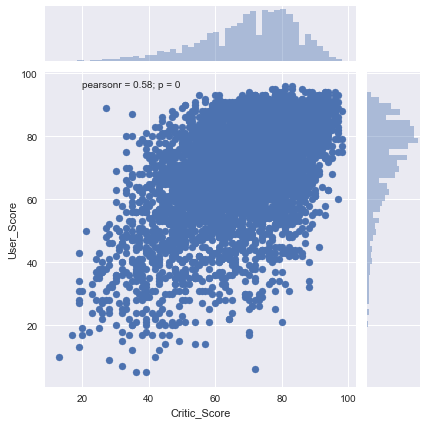

In [15]:
g = sns.jointplot('Critic_Score', 'User_Score', data=video_games)

The joint plot creates a scatter plot and relevant histograms for each variable.

## Choose one continuous variable and one categorical variable, and plot them six different ways.

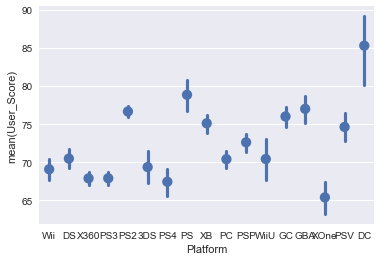

In [84]:
g = sns.pointplot(x='Platform', y='User_Score', data=video_games, size=4, aspect=2, join=False)


The point plot visualizes the mean for a numeric value for each category with measures of uncertainty depicted by error bars.

However, this plot only shows the mean when it may be more useful to see a distribution plot for each category.

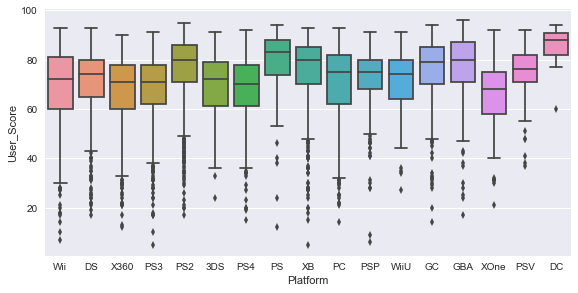

In [74]:
g = sns.FacetGrid(video_games, size=4, aspect=2)
ax = sns.boxplot(x='Platform', y='User_Score', data=video_games)


Box plot shows the distribution of quantitative data. The box and whiskers show the quartiles of the data set. Outliers are marked above and below as determined by the quartile ranges.

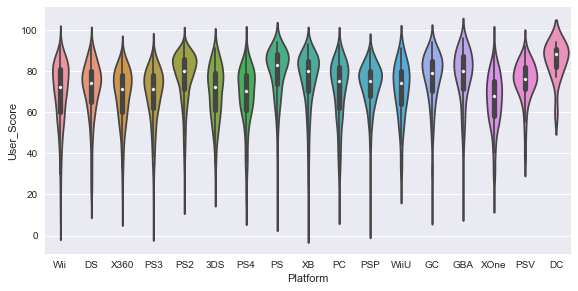

In [76]:
g = sns.FacetGrid(video_games, size=4, aspect=2)
ax = sns.violinplot(x='Platform', y='User_Score', data=video_games)

The violin plot is very similar to the box and whisker plot. Unlike the box plot, kernel density estimations are used in lieu of boxes, whiskers and outlier points.

Violin plots are estimated by sample size. Thus, relatively small samples might look misleadingly smooth.

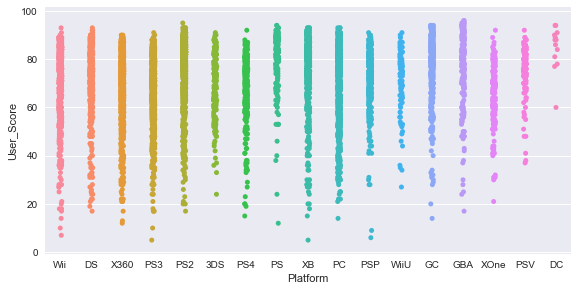

In [79]:
g = sns.FacetGrid(video_games, size=4, aspect=2)
ax = sns.stripplot(x='Platform', y='User_Score', data=video_games, jitter=0.05)

Used primarily in conjunction with a box or violin plot to represent the underlying distribution.

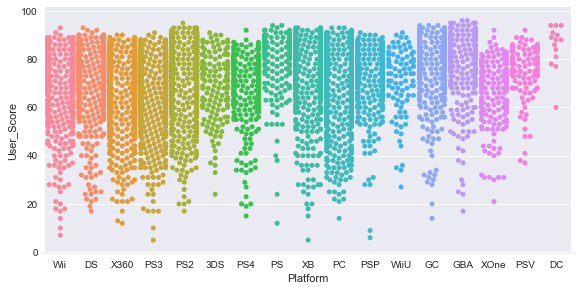

In [87]:
g = sns.FacetGrid(video_games, size=4, aspect=2)
ax = sns.swarmplot(x='Platform', y='User_Score', data=video_games)

Very similar to the stripplot, however, none of the points overlap. The lack of overlap provides a better representation of the value distribution.

It does not scale well with a large number of observations.

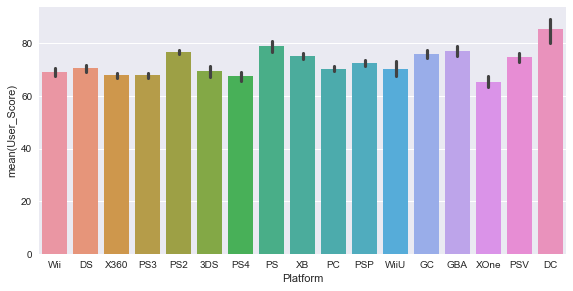

In [88]:
g = sns.FacetGrid(video_games, size=4, aspect=2)
ax = sns.barplot(x='Platform', y='User_Score', data=video_games)

The bar plot represents an estimate of central tendency for a quantitative value with the height of each bar. 

Bar plots include 0 in the range. Good for when 0 is a meaningful value.

Shows only the mean as a measure of central tendency when it may be more useful to see a distribution for a certain category.

## Probability distributions

In [24]:
vg_corr = video_games[['NA_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']]

In [33]:
vg_corr.corr()

,NA_Sales,EU_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.839989,0.727128,0.955483
EU_Sales,0.839989,1.000000,0.716469,0.938664
Other_Sales,0.727128,0.716469,1.000000,0.804505
Global_Sales,0.955483,0.938664,0.804505,1.000000


In [22]:
# pick out the variables that I want to focus on and revisit
# use the df.corr() -> look for correlations and plot the ones that show the strongest correlations
# NA_Sales, EU_Sales, Other_Sales, Global_Sales, User_Score, Critic_Score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110734B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1142CCB0>]], dtype=object)

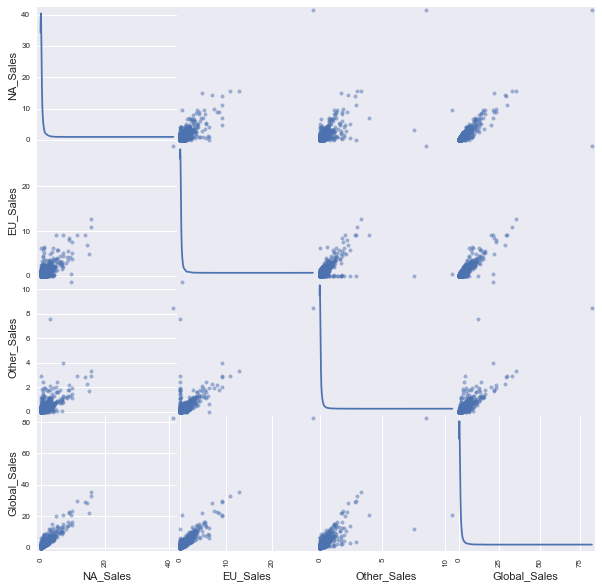

In [41]:
scatter_matrix(vg_corr, alpha=0.5, diagonal='kde', figsize=(10, 10))

This scatter plot has predictable correlations between sales by region and global sales. 